In [1]:
import numpy as np
import pandas as pd
import os

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt

C:\Users\prath\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_width=img_height = 224
batch_size = 16
nb_train_samples = 5216
nb_validation_samples = 16
nb_test_samples = 624
epochs = 5

In [3]:
train_data_dir = '/chest_xray/train'
validation_data_dir = '/chest_xray/val'
test_data_dir = '/chest_xray/test'

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
activation_3 (Activation)    (None, 112, 112, 32)      0         
__________

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size,
    shuffle=False)

Epoch 1/5
326/326 [==============================] - 151s 462ms/step - loss: 0.3866 - acc: 0.8470 - val_loss: 0.6461 - val_acc: 0.7804
Epoch 2/5
326/326 [==============================] - 142s 434ms/step - loss: 0.1629 - acc: 0.9404 - val_loss: 0.5482 - val_acc: 0.7821
Epoch 3/5
326/326 [==============================] - 142s 434ms/step - loss: 0.1321 - acc: 0.9515 - val_loss: 0.9060 - val_acc: 0.7532
Epoch 4/5
326/326 [==============================] - 141s 434ms/step - loss: 0.1137 - acc: 0.9647 - val_loss: 1.2427 - val_acc: 0.7468
Epoch 5/5
326/326 [==============================] - 142s 436ms/step - loss: 0.1024 - acc: 0.9672 - val_loss: 0.6281 - val_acc: 0.7917


In [12]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('Pneumonia.h5')


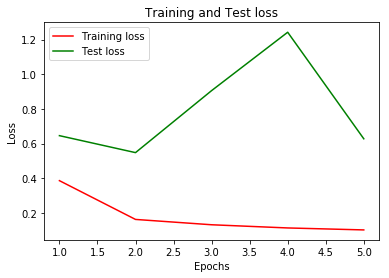

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss',)
plt.plot(epochs, val_loss, color='green', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

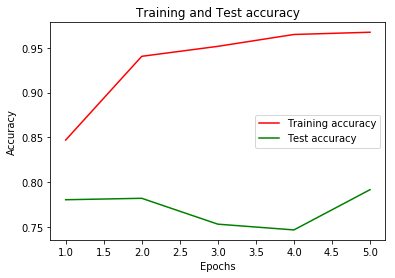

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training accuracy')
plt.plot(epochs, val_acc, color='green', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
scores = model.evaluate_generator(test_generator,steps=nb_test_samples // batch_size)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 79.65%
